### EDA auto.ru

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

sns.set()
%matplotlib inline

In [3]:
df = pd.read_csv('dataset.csv', sep=';')
df

,date,title,brand,model,gear,drive,color,year,mileage,price,engine_vol,hps,fuel
0,2020-11-26,AC Cobra Mk V,ac,cobra,механика,задний,белый,1999,33000,11000000,4.9,340,бензин
1,2020-11-26,AC Cobra Mk V,ac,cobra,механика,задний,красный,2004,2500,6950000,4.9,370,бензин
2,2020-11-26,AC Cobra Mk IV,ac,cobra,механика,задний,красный,2001,13500,1800000,4.9,326,бензин
3,2020-11-26,Acura MDX III,acura,mdx,автомат,полный,белый,2014,123060,2035000,3.5,290,бензин
4,2020-11-26,Acura MDX III,acura,mdx,автомат,полный,серый,2014,135000,1650000,3.5,290,бензин
...,...,...,...,...,...,...,...,...,...,...,...,...,...
62216,2020-11-26,УАЗ 3151 31512,uaz,3151,механика,полный,зелёный,2003,10000,250000,2.5,90,бензин
62217,2020-11-26,УАЗ 3151 3151,uaz,3151,механика,полный,зелёный,2003,20000,450000,2.5,76,бензин
62218,2020-11-26,УАЗ Hunter 315196,uaz,hunter,механика,полный,белый,2012,39500,600000,2.7,112,бензин
62219,2020-11-26,УАЗ Hunter 315196,uaz,hunter,механика,полный,зелёный,2010,22415,300000,2.7,112,бензин


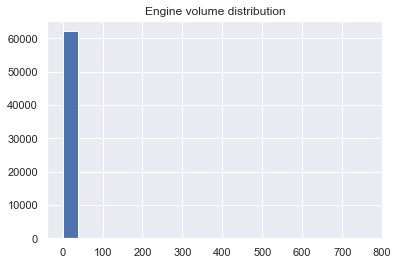

In [52]:
plt.hist(df['engine_vol'], bins=20)
plt.title('Engine volume distribution');

In [55]:
np.percentile(df['engine_vol'], 99.6)

6.2

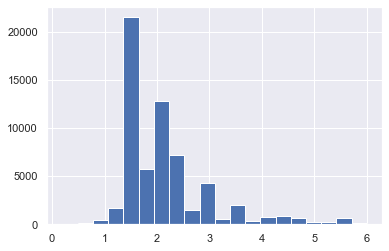

In [60]:
df = df.drop(df[df['engine_vol'] > np.percentile(df['engine_vol'], 99.6)].index)
plt.hist(df['engine_vol'], bins=20);

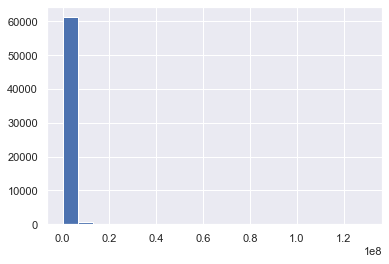

In [78]:
plt.hist(df['price'], bins=20);

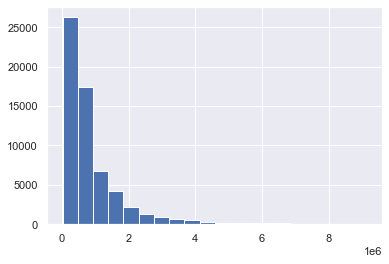

In [79]:
df = df.drop(df[df['price'] > np.percentile(df['price'], 99.6)].index)
plt.hist(df['price'], bins=20);

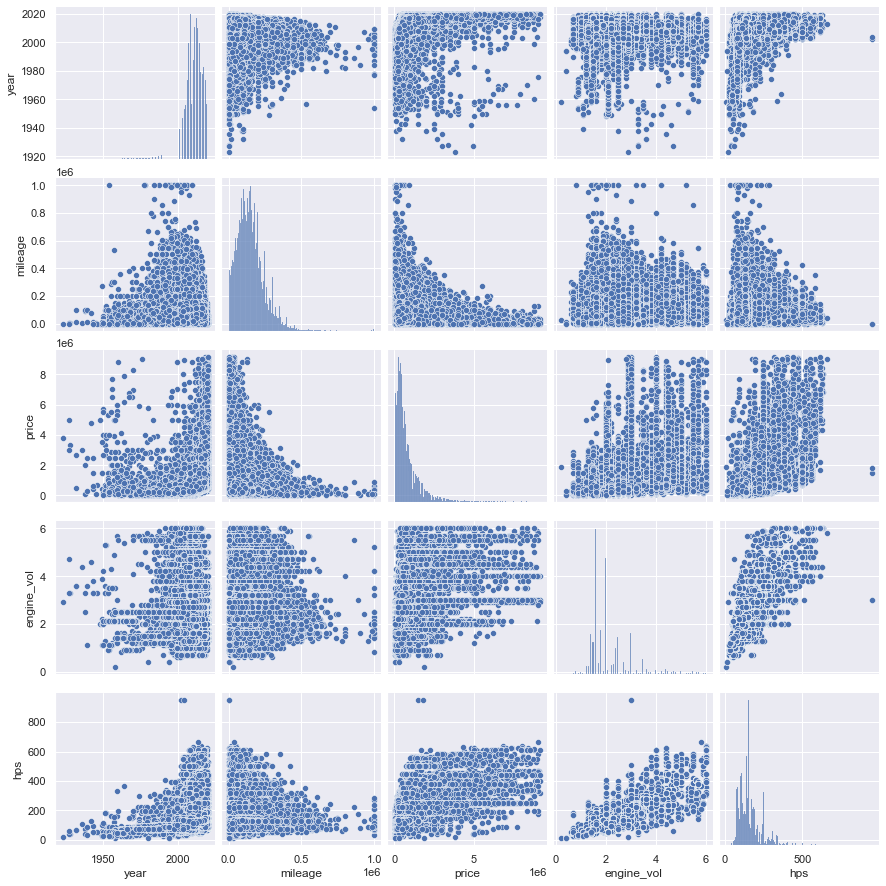

In [80]:
sns.pairplot(data=df);

In [81]:
df.shape

(61617, 13)

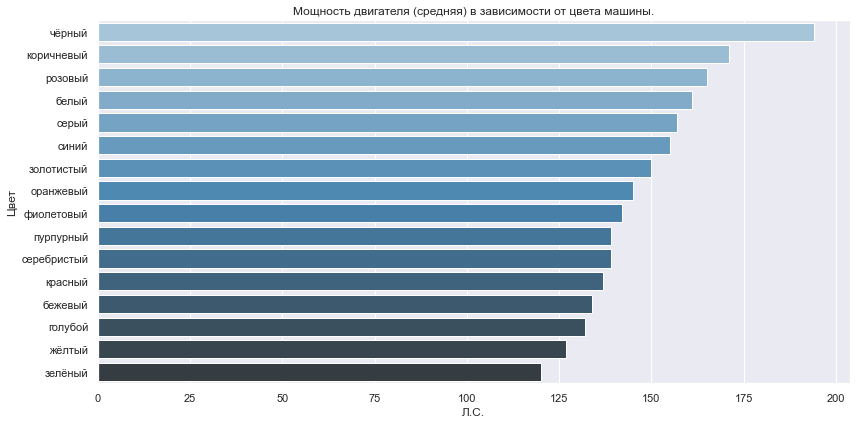

In [10]:
color_hps = df[['color', 'hps']].groupby('color').mean().astype('int').sort_values(by='hps', ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x=color_hps['hps'], y=color_hps.index, palette='Blues_d')
plt.title('Мощность двигателя (средняя) в зависимости от цвета машины.')
plt.xlabel('Л.С.')
plt.ylabel('Цвет')
plt.tight_layout()
plt.savefig('hps-color.jpg')

In [7]:
br_col = df[['brand', 'color', 'hps']].groupby(['brand', 'color'], as_index=False).count().sort_values(by='hps', ascending=False).rename(mapper={'hps': 'count'}, axis=1).head(20)
br_col['car_color'] = br_col['color'] + ' ' + br_col['brand']
br_col.drop(['color', 'brand'], axis=1, inplace=True)
br_col.set_index('car_color', inplace=True)
br_col.head(20)

,count
car_color,
чёрный mercedes,1675
чёрный bmw,1393
чёрный nissan,967
чёрный audi,905
чёрный toyota,896
чёрный volkswagen,861
белый kia,786
белый volkswagen,754
чёрный ford,749
